<a href="https://colab.research.google.com/github/Jeetesh-KumarM/CAPSTONE-PROJECT-4-CLUSTERING/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Learning (Clustering)
##### **Contribution**    - Individual


# **Project Summary -**

We have been provided with Netflix Movies and TV Shows dataset which includes several features like Show id, Type of content, Title ,Name of the Director(s),Name of the Cast(s),Country,Date added,Release year,Rating,Duration,Type of Genre and Description.There were around 7787 records and 12 attributes in the dataset.
The process followed:
1. Analysed the data- The number of rows and columns it had,type of the features presented,the kind of data each particular feature had,checked for duplicated or missing values.
2. Data manipulation- Checked for outliers and null values and fiixed it with the necessary operations.
3. Data Visualization - plotted various graphs and like Percentage of Movies and TV Shows present,Monthly count for the type of Content,Top 10 directors based on the number of shows they have directed,Top 10 Actors based on the number of shows they have worked in, Countries producing shows,the duration of movies and TV Shows and etc.Also plotted heatmap to find the correlation between different features.
4. Data Pre-processing and feature selection- Dropped the unnecessary columns and rows.Performed Text Data Processing like contraction,removing urls,punctuations and stopwords.Also performed tokenization and vectorization.
5. Model Implementation - 2 model have been created with different ML Algorithms:K-Means Clustering and Hierarchical Clustering.
6. K-Means Clustering:It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
7. K-means clustering have some challenges which are a predetermined number of clusters, and it always tries to create the clusters of the same size. To solve these two challenges, we can opt for the hierarchical clustering algorithm because, in this algorithm, we don't need to have knowledge about the predefined number of clusters.
8. Davies-Bouldin Index is used for the evaluation of the models.
9. Davies-Bouldin Index measures the size of clusters against the average distance between clusters.
10. Using Cosine similarity a recommendation function is created to provide the title of shows which are similar in nature. 



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search.**

**In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.**

**Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

**In this project we are required to do:** 

**1.Exploratory Data Analysis**

**2. Understanding what type of content is available in different countries**

**3. If Netflix has been increasingly focusing on TV rather than movies in recent years.**

**4. Clustering similar content by matchmaking text-based features.**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# library used for Analyzing and Visualization purpose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',encoding='latin-1')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

The dataset has 7787 rows and 12 columns

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
# Percentage of missing values present
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

<Axes: >

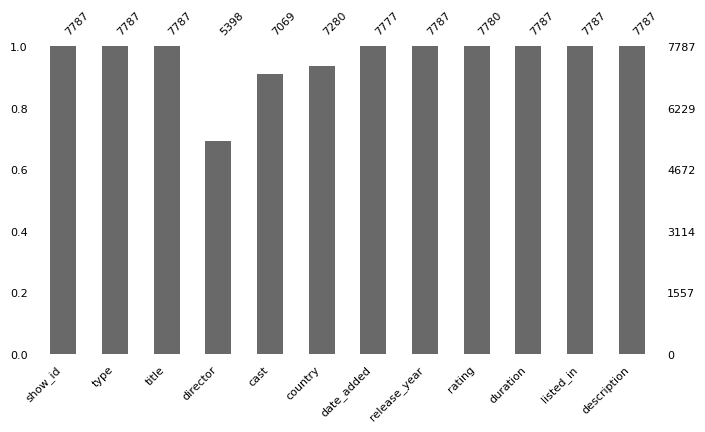

In [10]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, figsize=(8,4), fontsize=8)

### What did you know about your dataset?

1. Dataset contains 7787 rows and 12 columns.
2. director column has 2389(i.e 30.7%) rows as null.
3. cast columns has 718(i.e 9.2%) rows as null.
4. country has 507,date_added has 10 and rating has 7 null values.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

count        mean       std     min     25%     50%     75%  \
release_year  7787.0  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0   

                 max  
release_year  2021.0

### Variables Description 

1. show_id: Unique id for every movies/TV show.
2. type: movie or TV show.
3. title: Title of the Movie/TV show.
4. director: Director of the show.
5. cast: Actors involved.
6. country: Country of production.
7. date_added: Date it was added on netflix.
8. release_year: Actual release year of the show.
9. rating: TV rating of the show.
10. duration: Total duration in minutes or number of seasons.
11. listed_in: Genre
12. description: The summary discription.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in list(df.columns):
  print(i)
  print(df[i].unique())
  print('length:',len(df[i].unique()))
  print('-'*50)

show_id
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
length: 7787
--------------------------------------------------
type
['TV Show' 'Movie']
length: 2
--------------------------------------------------
title
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
length: 7787
--------------------------------------------------
director
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
length: 4050
--------------------------------------------------
cast
['JoÃ£o Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, ZezÃ© Motta, Celso Frateschi'
 'DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudh

## ***3.Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
#creating a copy of dataframe
df1=df.copy()

In [15]:
#Replacing the null values with white spaces
df1['director'].fillna(' ',inplace=True)
df1['cast'].fillna(' ',inplace=True)
df1['country'].fillna(' ',inplace=True)
df1['rating'].fillna(' ',inplace=True)

In [16]:
#Changing the datatype of date_added column to datetime and extracting month and year from it
df1['date_added']=pd.to_datetime(df1['date_added'])
df1['day']=pd.DatetimeIndex(df1['date_added']).day
df1['month']=pd.DatetimeIndex(df1['date_added']).month
df1['added_year']=pd.DatetimeIndex(df1['date_added']).year

In [17]:
#Replacing null values in added_year with the corresponding release year
df1['added_year'] = df1['added_year'].fillna(df.pop('release_year'))

In [18]:
#Separating TV Shows and Movies
dftvs=df1[df1['type']=='TV Show']
dfm=df1[df1['type']=='Movie']

### What all manipulations have you done and insights you found?

1. The null values present has been replaced with white space since the dataset size is not large and dropping might lose valuable data.
2. Extracted 3 new columns from date_added column.
3. Created separate dataset for Movies and TV Shows.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1- Movies and TV Shows count

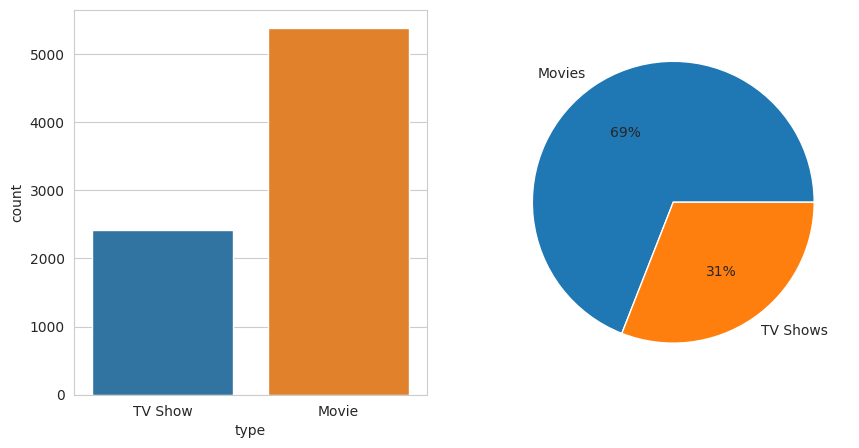

In [19]:
# Chart - 1 visualization code
#Counting the number of Movies and TV Show 
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
sns.countplot(x=df1['type'],ax=ax[0])
#Pie Chart 
labels = 'Movies' , 'TV Shows'
ax[1].pie(df1['type'].value_counts(), labels=labels, autopct='%0.0f%%')
plt.show()

##### 1. Why did you pick the specific chart?

To know whether Netflix is focusing more on Movies than Tv Shows.

##### 2. What is/are the insight(s) found from the chart?

1. Out of the overall content present 31% are TV Shows and 69% are Movies.
2. This shows that Netflix is focusing more on Movies than TV Shows. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,based on the number of movies and TV shows and their response among the audience Netflix can decide to invest on the type of content which is popular.

#### Chart - 2-Movies and TV Shows Monthly count

<Axes: xlabel='month', ylabel='count'>

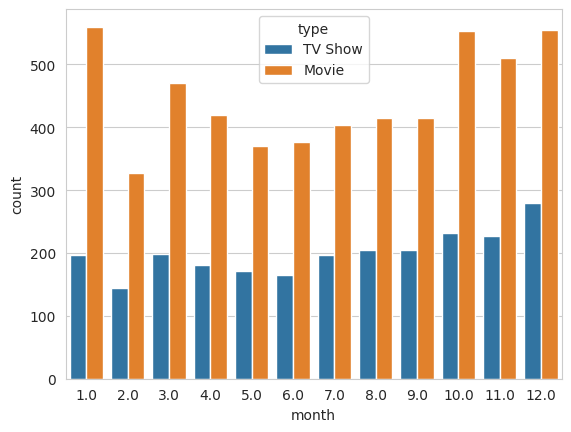

In [20]:
# Chart - 2 visualization code
sns.countplot(x='month',hue='type',data=df1)

##### 1. Why did you pick the specific chart?

To know the monthwise release of the content.

##### 2. What is/are the insight(s) found from the chart?

1. Release of Movies and TV shows are high in the month of October, November and December.
2. Least number of Movies and TV Shows are released on February.
3. May and June also have less releases.
4. Month of November , December and January have high releases which can be due to the holiday season.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,It can be seen that holiday season have high number of releases and based on the audience's response it can be determine whether it'll be profitable or not to release a show during holidays. 

#### Chart - 3-Top 10 Directors

In [21]:
# Chart - 3 visualization code
#Extracting known directors' data 
x=df1[df1['director']!=' ']
x1=dftvs[dftvs['director']!=' ']
x2=dfm[dfm['director']!=' ']

<Axes: title={'center': 'Top 10 Directors'}, xlabel='count', ylabel='director'>

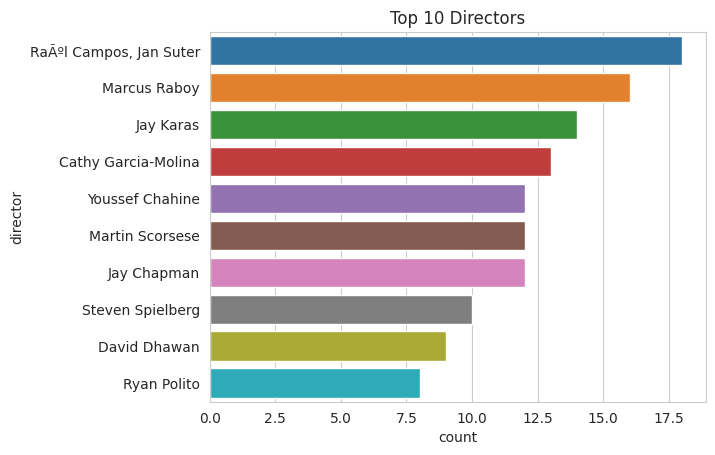

In [22]:
#Countplot for directors who have directed the highest no. of Movies and TV Shows
plt.title('Top 10 Directors')
sns.countplot(y=x['director'],order=x.director.value_counts().iloc[:10].index)

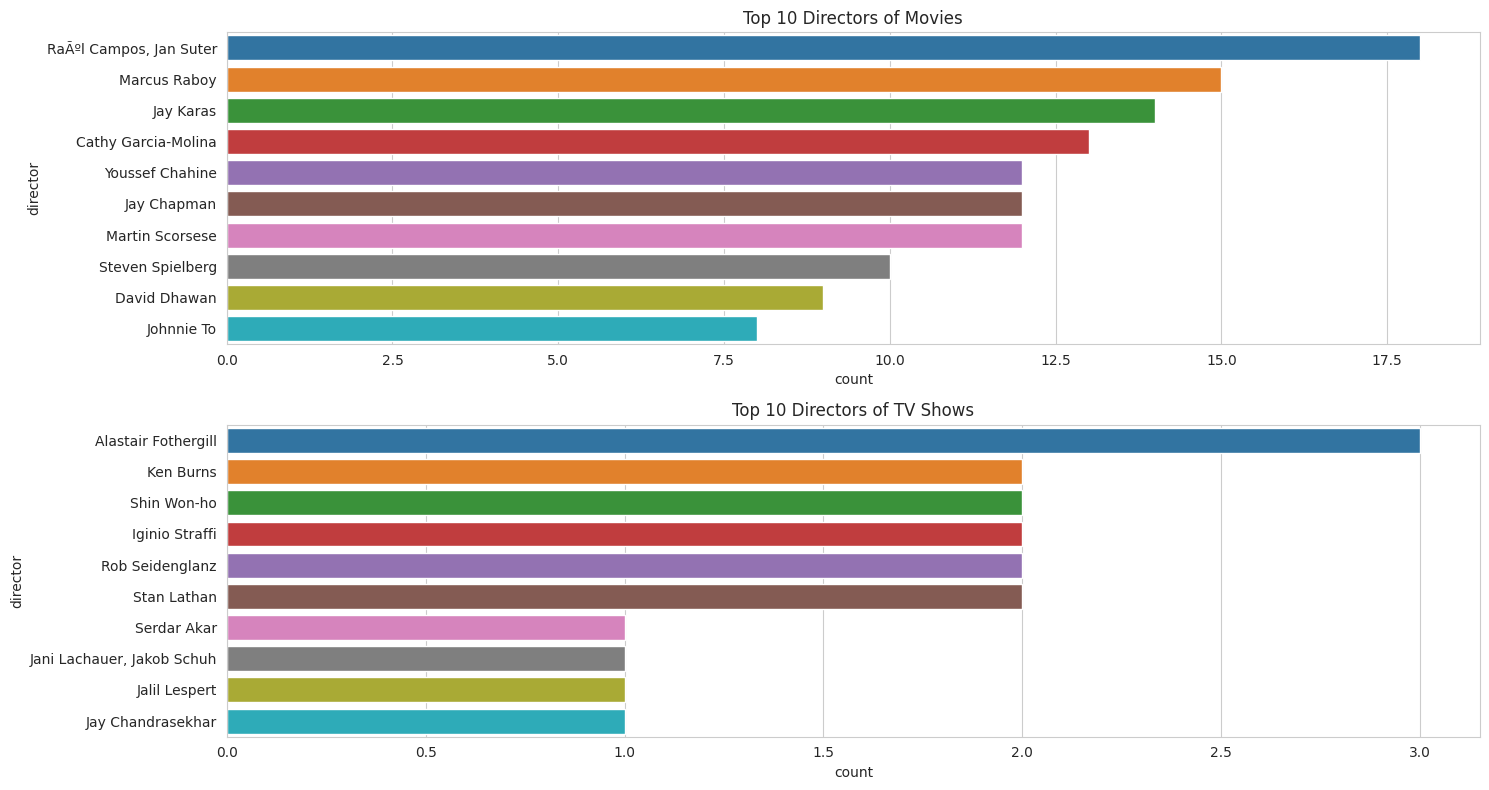

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
#Director for Movies
sns.countplot(y=x2['director'],order=x2.director.value_counts().iloc[:10].index,ax=axes[0])
axes[0].set_title('Top 10 Directors of Movies')
#Director for TV Shows
sns.countplot(y=x1['director'],order=x1.director.value_counts().iloc[:10].index,ax=axes[1])
axes[1].set_title('Top 10 Directors of TV Shows')
fig.tight_layout()

##### 1. Why did you pick the specific chart?

To know which director has directed the highest number of shows.

##### 2. What is/are the insight(s) found from the chart?

1. RaAoL Campos and Jan Suter have directed the highest number of Movies followed by Marcus Raboy.
2. In TV Shows Alastair Fothergill directed highest number of TV Shows followed by Ken Burns.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It can be determined that which Director's work is highly appreciated by the audience and also which director's work is not liked by the audience which will help in detemining the profit a show can earn since many people prefer to watch movies directed by some renowed director like Chirstopher Nolan,etc. 

#### Chart-4-Cast

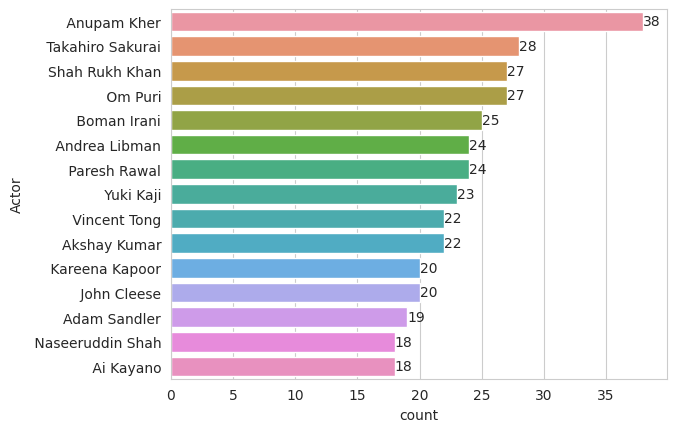

In [24]:
# Chart - 4 visualization code
cst=df1['cast'].str.split(',', expand=True)
cst=cst.stack().reset_index()
ax=sns.countplot(data=cst,y=cst[0],order=cst[0].value_counts().iloc[1:16].index)
ax.set_ylabel('Actor')
for label in ax.containers:
    ax.bar_label(label)

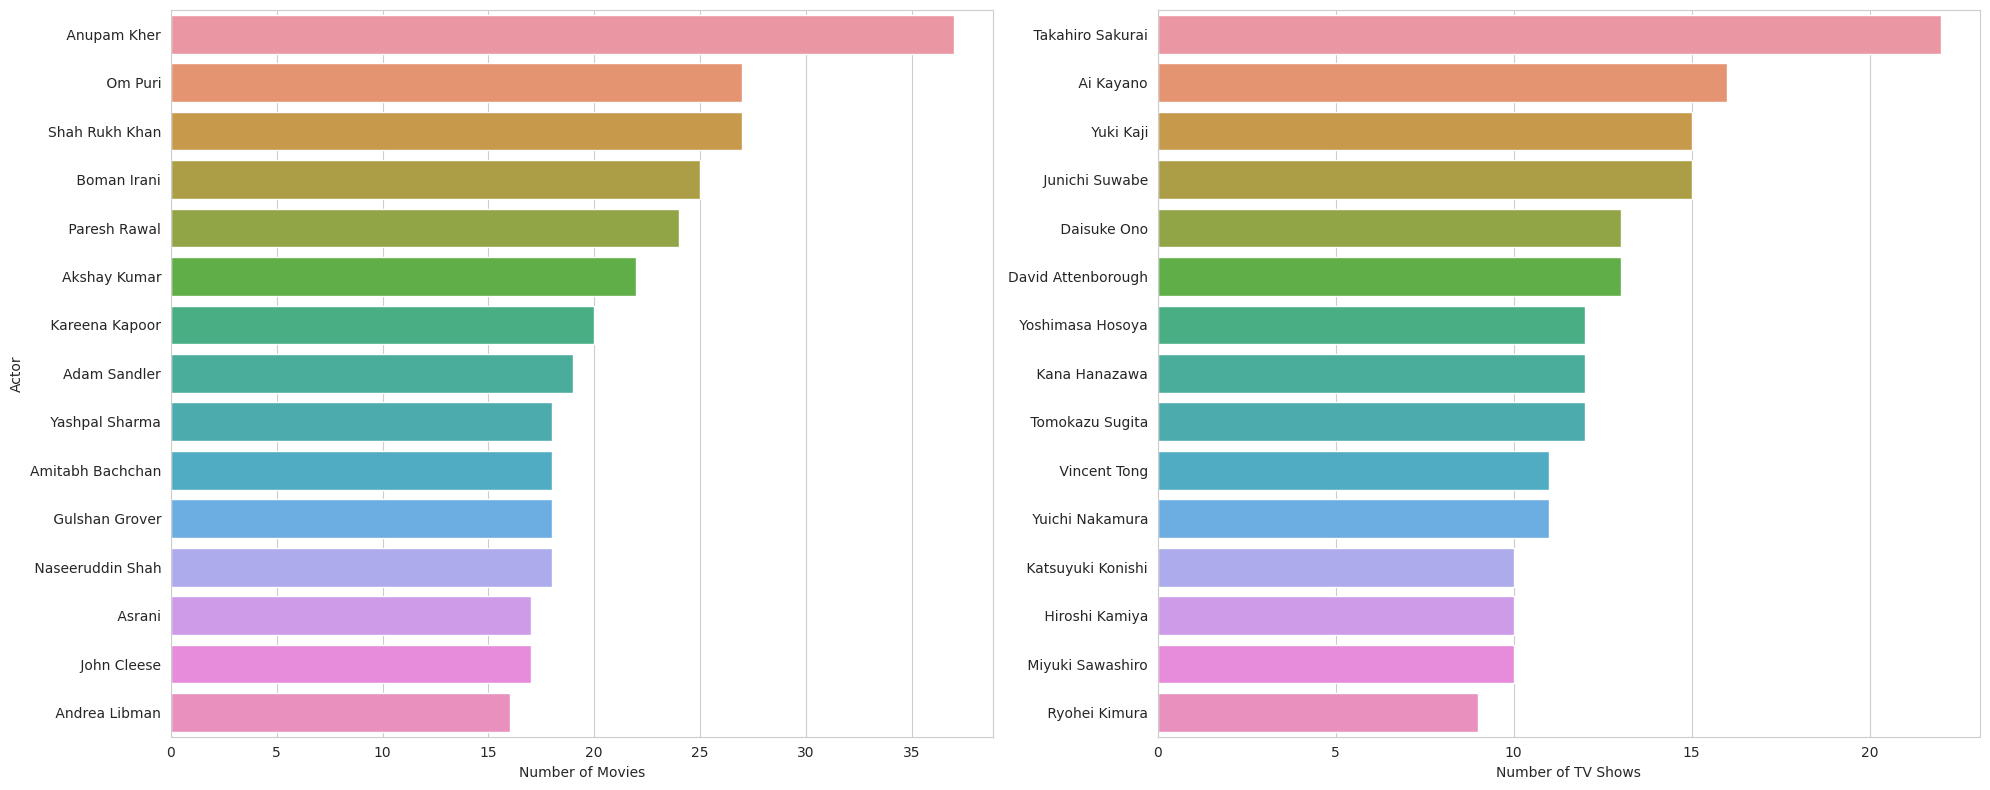

In [25]:
#Cast for Movies
cstm=dfm['cast'].str.split(',', expand=True)
cstm=cstm.stack().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
sns.countplot(data=cstm,y=cstm[0],order=cstm[0].value_counts().iloc[1:16].index,ax=ax[0])
ax[0].set_ylabel('Actor')
ax[0].set_xlabel('Number of Movies')

#Cast for TV Shows
csttvs=dftvs['cast'].str.split(',', expand=True)
csttvs=csttvs.stack().reset_index()
sns.countplot(data=csttvs,y=csttvs[0],order=csttvs[0].value_counts().iloc[1:16].index,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('Number of TV Shows')
fig.tight_layout()

##### 1. Why did you pick the specific chart?

To know which Actor has acted in the highest number of shows.

##### 2. What is/are the insight(s) found from the chart?

1. Anupam Kher has acted in the highest number of shows followed by Takahiro Sakurai.
2. In Movies Anupam Kher has acted the most followed by Om Puri.
3. In TV Shows Takahiro Sakurai has acted the most followed by Ai Kayano.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,Since Actors have a huge fan following, their presence in a movie/TV show can impact the profit earned by the show. 

#### Chart - 5-Country

<Axes: xlabel='count', ylabel='country'>

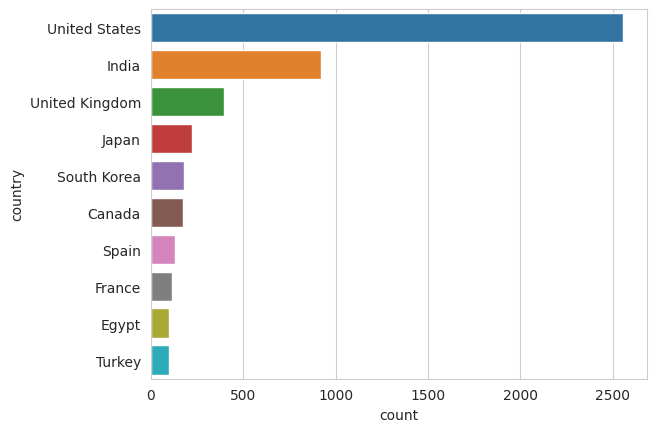

In [26]:
# Chart - 5 visualization code
cty=df1[df1['country']!=' ']
sns.countplot(y=cty['country'],order=cty.country.value_counts().iloc[:10].index)

##### 1. Why did you pick the specific chart?

To know which countries are producing highest number of shows.

##### 2. What is/are the insight(s) found from the chart?

1. United States produces the highest number of shows followed by India and United Kingdom.
2. Japan,South Korea and Canada also produces a significant amount of shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Number of shows produced by a country and its returned profit will be helpful for producer to choose the country where they can invest in the shows produced by the country.

#### Chart - 6-Releasing Year

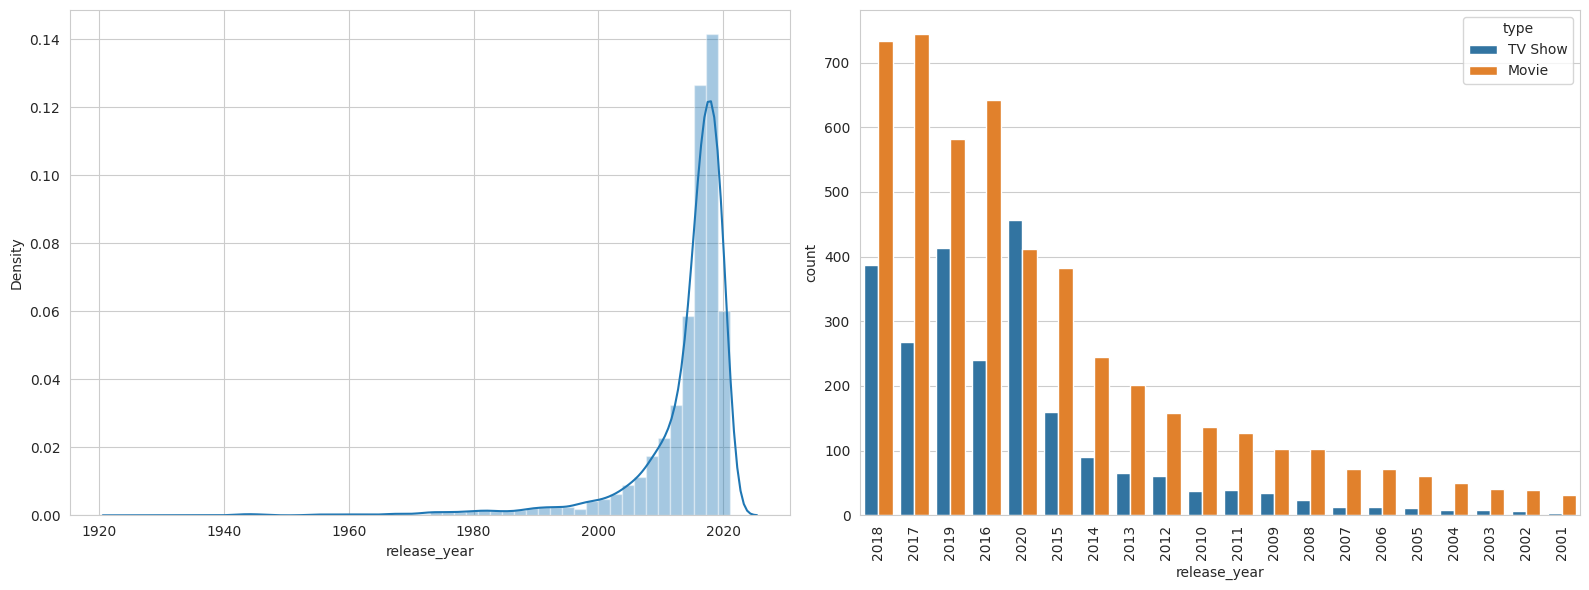

In [27]:
# Chart - 6 visualization code
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6)) 
sns.distplot(df1['release_year'],ax=ax[0])
sns.countplot(data=df1,x='release_year',hue='type',order=df1.release_year.value_counts().iloc[:20].index,ax=ax[1])
plt.xticks(rotation=90)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

To know which year has the highest number of releases.

##### 2. What is/are the insight(s) found from the chart?

1. Highest number of shows released is during 2018-2019 and the reason can be due to the lockdown imposed and people were streaming more than usual.
2. Only in the year 2020 we can see that the number TV shows released were higher than the movies.

#### Chart - 7-Releaing Month

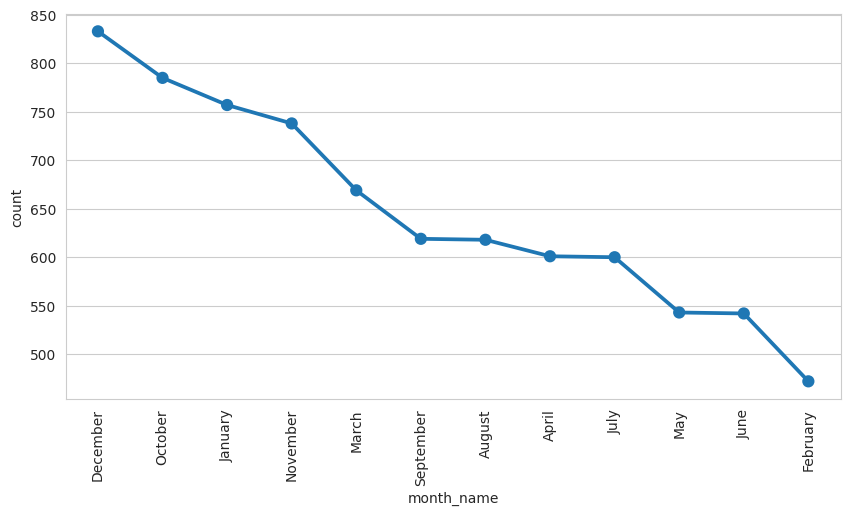

In [28]:
# Chart - 7 visualization code
m={1.0:'January',2.0:'February',3.0:'March',4.0:'April',5.0:'May',6.0:'June',7.0:'July',8.0:'August',9.0:'September',10.0:'October',11.0:'November',12.0:'December'}
df1['month_name']=df1['month'].replace(m)
rat = df1.groupby(['month_name'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(10, 5))
sns.pointplot(x='month_name',y='count',data=rat)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know which month has the highest and the lease releases.

##### 2. What is/are the insight(s) found from the chart?

1. December has the highest releases as it's a holiday season followed by October and January.
2. February has the least releases. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,releasing during holiday season may be profitable and will also engage a large user.

#### Chart - 8-Rating

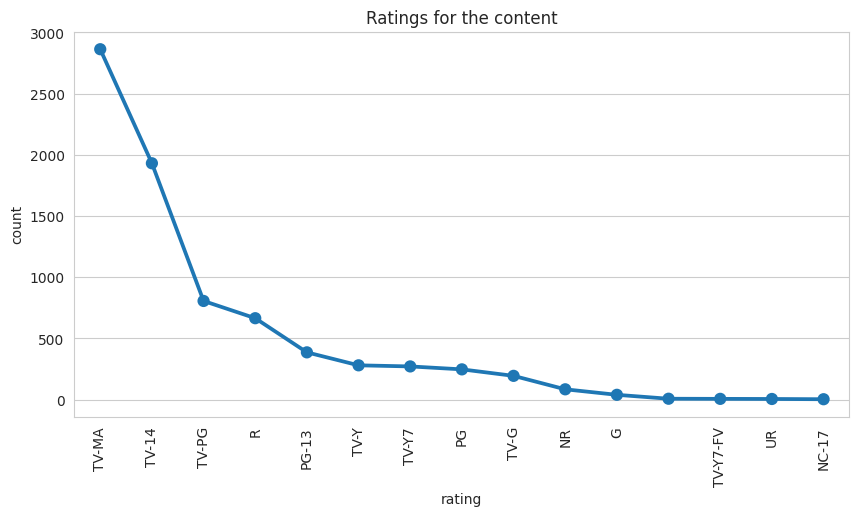

In [29]:
# Chart - 8 visualization code
rat = df1.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(10, 5))
sns.pointplot(x='rating',y='count',data=rat)
plt.title('Ratings for the content')
plt.tick_params(axis="x", rotation=90)

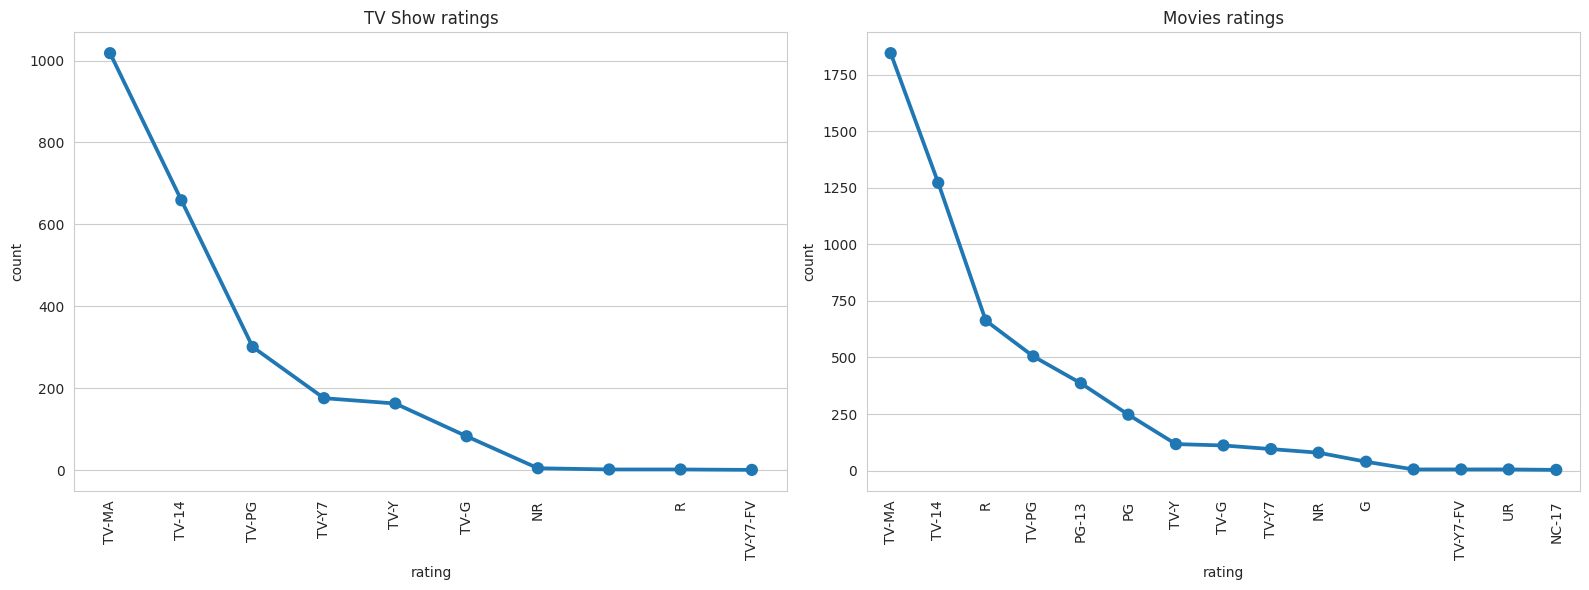

In [30]:
#Type of Ratings for TV Shows and Movies respectively
tv_ratings = dftvs.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
movie_ratings=dfm.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))  
#TV Shows
sns.pointplot(x='rating',y='count',data=tv_ratings,ax=ax[0])
ax[0].set_title('TV Show ratings')
ax[0].tick_params(axis="x", rotation=90) 
#Movies
sns.pointplot(x='rating',y='count',data=movie_ratings,ax=ax[1])
ax[1].set_title('Movies ratings')
ax[1].tick_params(axis="x", rotation=90)
fig.tight_layout()

##### 1. Why did you pick the specific chart?

To know what type of rating are giving to shows.

##### 2. What is/are the insight(s) found from the chart?

1. Highest number of shows have TV-MA(Mature Audience) rating followed by TV-14 and TV-PG.
2. NC-17 rating is present for the least number of shows.
3. The presence of R rated TV shows are less whereas many Movies have R rating and it's 3rd in terms of number.   

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,rating will imply that what type of user it's catering to and how much profit can be earned.

#### Chart - 9-Duration

In [31]:
# Chart - 9 visualization code
#Getting the duration
#for Movies
dfm['duration']=dfm.duration.str[:-4]
dfm['duration']=dfm['duration'].astype(int)
#for TV Shows
dftvs['duration']=dftvs.duration.str[:2]
dftvs['duration']=dftvs['duration'].astype(int)

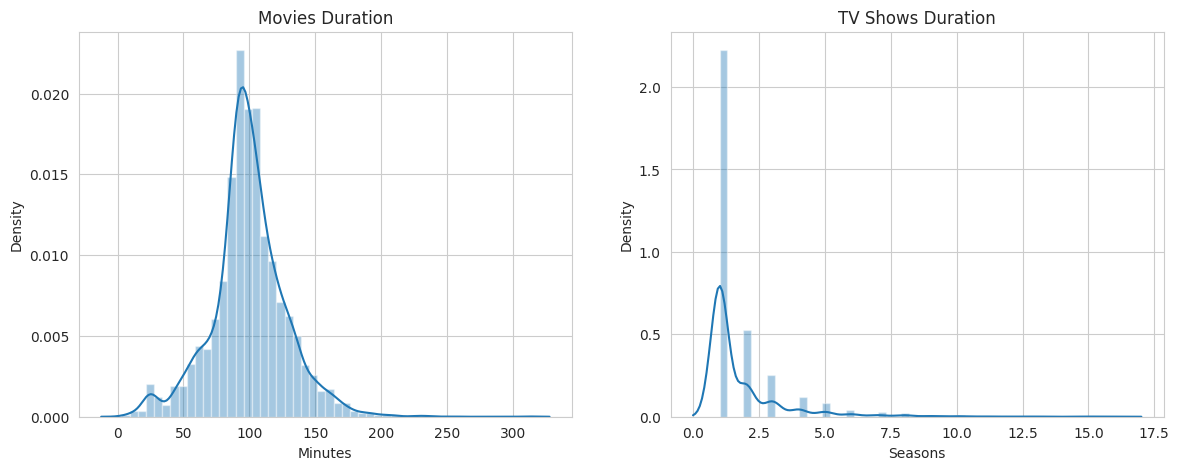

Average Movie length= 99.30797842663195 Minutes
Average TV Show length= 1.7759336099585061 Season


In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(14, 5)) 
#Movies
sns.distplot(x=dfm['duration'],ax=ax[0])
ax[0].set_title('Movies Duration')
ax[0].set_xlabel('Minutes')
#TV Shows
sns.distplot(x=dftvs['duration'],ax=ax[1])
ax[1].set_title('TV Shows Duration')
ax[1].set_xlabel('Seasons')
plt.show()
print('Average Movie length=',dfm['duration'].mean(),'Minutes')
print('Average TV Show length=',dftvs['duration'].mean(),'Season')

In [33]:
#Lengthiest Movie
print('Lengthiest Movie')
dfm.sort_values(by='duration',ascending=False).reset_index()[:1][['title','duration']]

Lengthiest Movie


title  duration
0  Black Mirror: Bandersnatch       312

In [34]:
#Lengthies TV Show
print('Lengthiest TV Show')
dftvs.sort_values(by='duration',ascending=False).reset_index()[:1][['title','duration']]

Lengthiest TV Show


title  duration
0  Grey's Anatomy        16

##### 1. Why did you pick the specific chart?

To know the range of duration and average of movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

1. Average length of a Movie is 99.30797842663195 Minutes
2. Average lenght of a TV Show is 1.7759336099585061 Season
3. Lengthiest movie is Black Mirror: Bandersnatch	of 312 minutes
4. Lengthiest TV shos is Grey's Anatomy	of 16 seasons

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll provide information regarding the duration of the movies and TV Shows preferred by the audience and the engament of the user based on the duration of the movie/TV show.

#### Chart - 10-Genre

Text(0, 0.5, '')

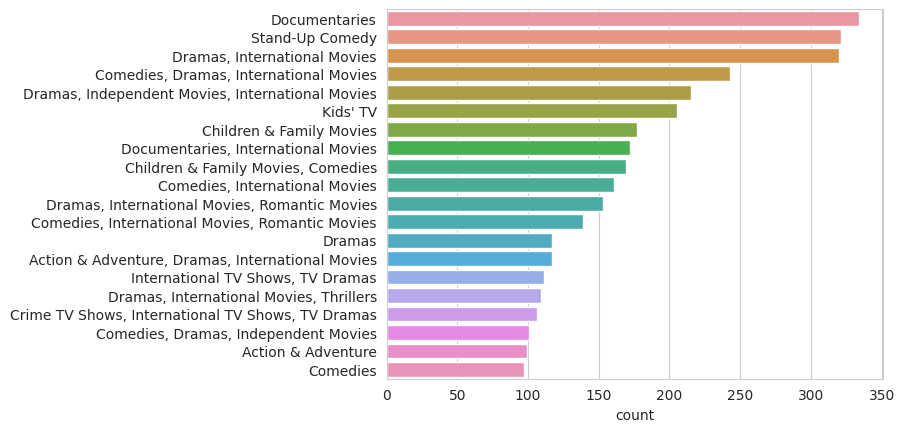

In [ ]:
# Chart - 10 visualization code
sns.countplot(data=df1,y=df1['listed_in'],order=df1['listed_in'].value_counts().iloc[:20].index)
plt.ylabel('')

Text(0.5, 1.0, 'TV Shows Genre')

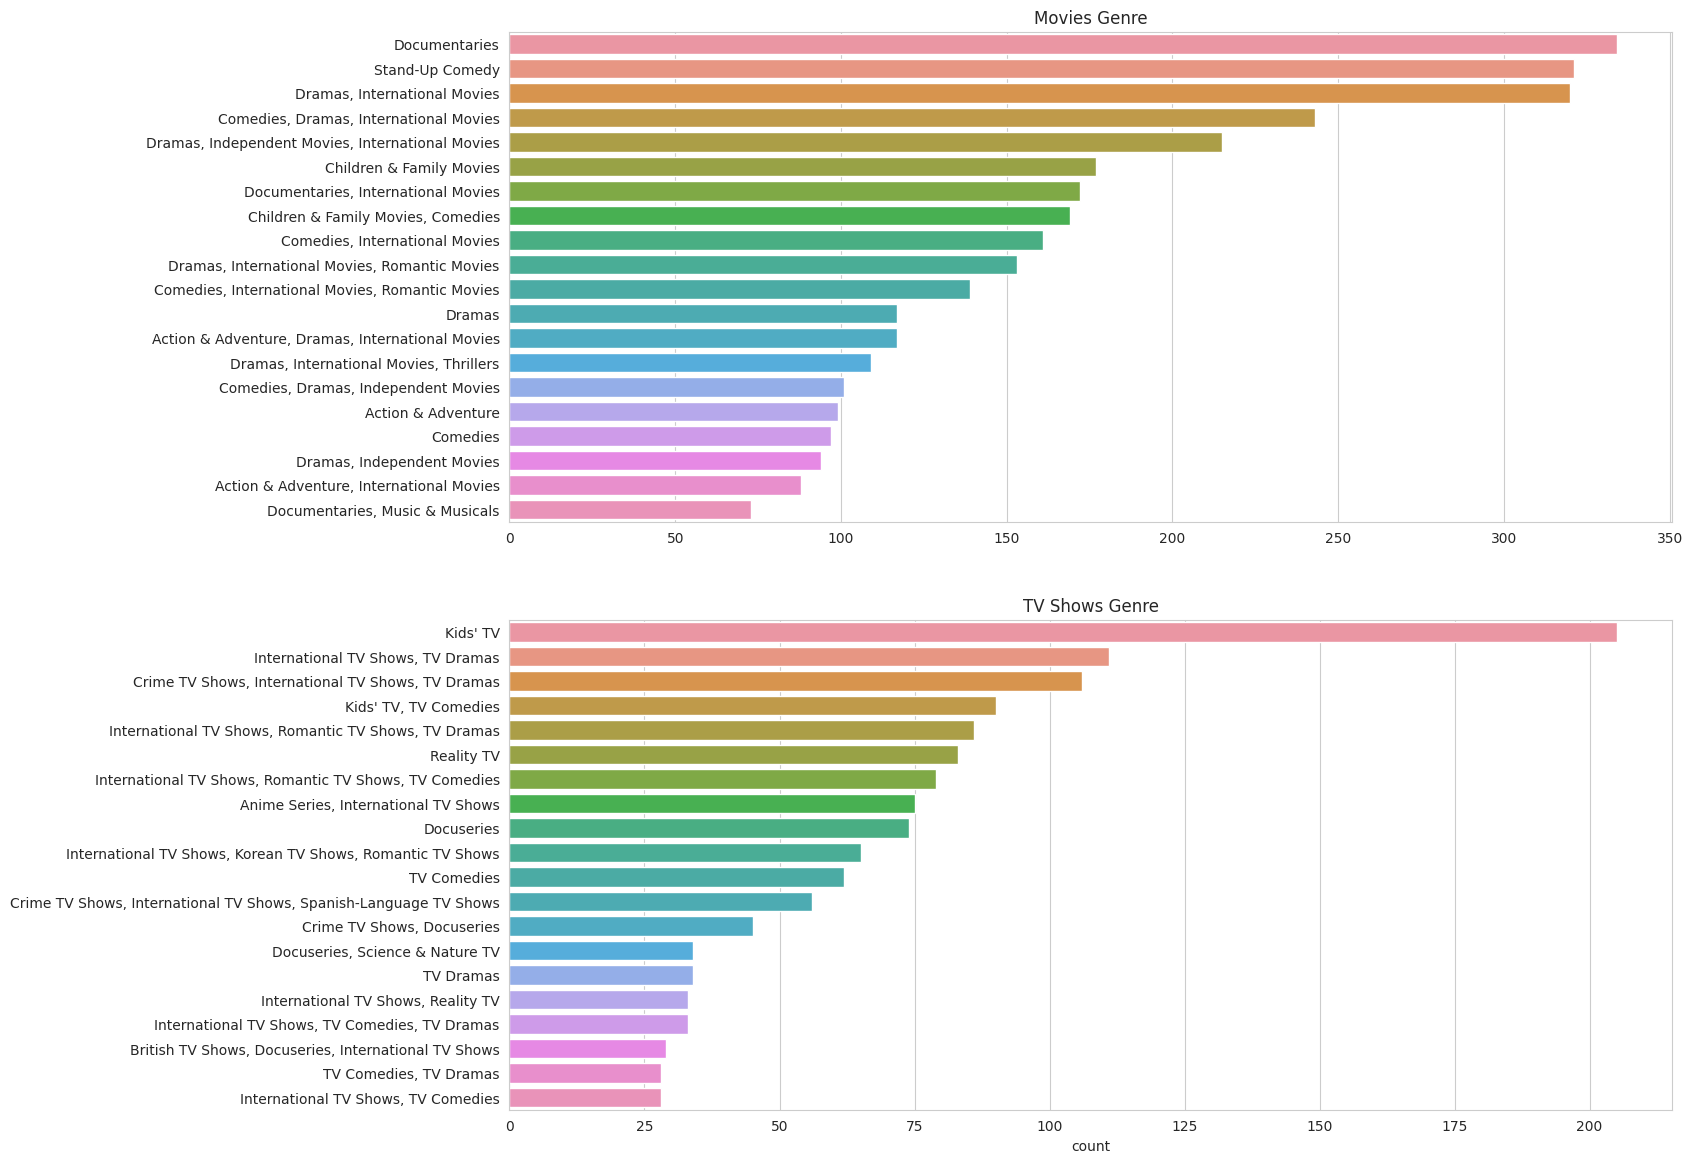

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(15, 14)) 
#Movies Genre
sns.countplot(data=dfm,y=dfm['listed_in'],order=dfm['listed_in'].value_counts().iloc[:20].index,ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_title('Movies Genre')
#TV Shows Genre
sns.countplot(data=dftvs,y=dftvs['listed_in'],order=dftvs['listed_in'].value_counts().iloc[:20].index,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('TV Shows Genre')


##### 1. Why did you pick the specific chart?

To know what type of genres are present and the number of movies/TV Shows belonging to it.

##### 2. What is/are the insight(s) found from the chart?

1. Overall most number of movies/TV shows belongs to Documentaries genre followed by Stand-Up comedy and Dramas,International Movies.
2. In terms of TV shows Kid's TV genre is most popular followed by International TV Shows, TV Dramas.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on the type of Genre liked by a large number of audiences it can be decided what movie/TV shows to be created further.

#### Chart - 11-Countries and Content Type

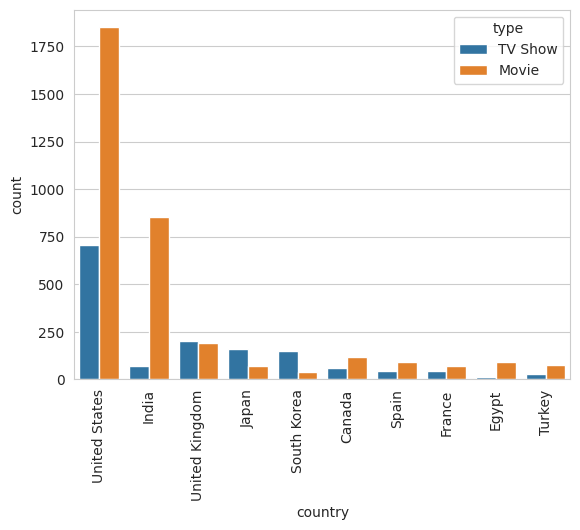

In [35]:
# Chart - 11 visualization code
cty=df1[df1['country']!=' ']
sns.countplot(data=cty,x='country',hue='type',order=cty.country.value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To know which country consumes which type of content and upto what extent.

##### 2. What is/are the insight(s) found from the chart?

1. United States produced the highest number of content.Around 700 TV Shows and 1875 movies.
2. India largely focuses on movies therefore it produces around 120 TV shows and 875 Movies.
3. Number of TV Shows and Movies produced by United Kingdom is almost equal.
4. In Japan and South Korea number of TV shows produced are higher than the movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It'll help to know the demands of audiences belonging to different counties. Since in countries like Japan and South Korea people prefer more TV shows and In country like India people prefer more movies.

#### Chart - 12 - Correlation Heatmap

In [ ]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    ' ':'Adults'
}
df1['target_ages']=df1['rating']
df1['target_ages'] = df1['target_ages'].replace(ratings)

In [ ]:
# Preparing data for heatmap
df1['count'] = 1
df1['country2']=df1['country']
df1['country2']=df1['country2'].replace([' '], 'United States')
data = df1.groupby('country2')[['country2','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country2']
df_heatmap = df1.loc[df1['country2'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country2'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country2       Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.367257    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008850    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.269912    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.353982    0.14   

country2     South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.472240  
Kids            0.027322  0.022388        0.093199       0.089484  
Older Kids      0.120219  0.044776        0.204030       0.195297  
Teens           0.382514  0.097015        0.188917       0.242978

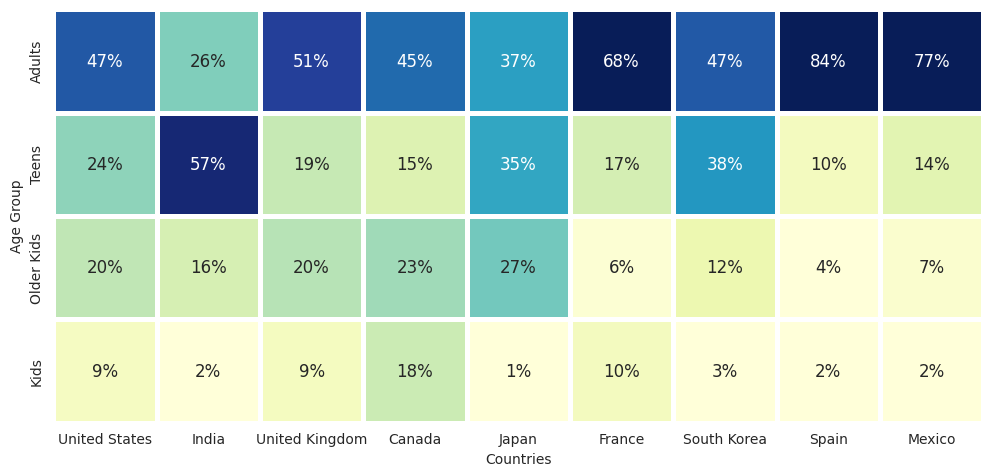

In [ ]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
       annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.xlabel('Countries')
plt.ylabel('Age Group')
plt.show()


##### 1. Why did you pick the specific chart?

To know the relation between the countries and the age group their content is targeting to.

##### 2. What is/are the insight(s) found from the chart?

1. United States focuses more on Adult and Teen age group.
2. India focuses mostly on Teens age group.
3. United States focuses mostly on Adult age group.
4. Canada focuses mostly on Adult age group.
5. Japan focuses on Adult,Teens and Older Kids.
6. France focuses mostly on Adult age group.
7. South Korea focuses mostly on Adult and Teen age group.
8. Spain and Mexico focuses mostly on Adult age group.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df1['final']=df1['title']+df1['director']+df1['description']+df1['cast']+' '+df1['country']+' '+df1['rating']+' '+df1['listed_in']

In [ ]:
#df1['final']=df1['title']+' '+df1['director']+' '+df1['description']+' '+' '+df1['country']+' '+df1['rating']+' '+df1['listed_in']

In [ ]:
df1['final'][0]

'3% In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.JoÃ£o Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, ZezÃ© Motta, Celso Frateschi Brazil TV-MA International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

Converting words like it'll, would've etc into it will, would have etc.

In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.6 MB/s eta 0:00:00


In [ ]:
# Expand Contraction
import contractions
def cont(x):
  return contractions.fix(x)

In [ ]:
df1['final']=df1['final'].apply(cont)

#### 2. Lower Casing

In [ ]:
# Lower Casing
def small_case(x):
  return x.lower()

In [ ]:
df1['final']=df1['final'].apply(small_case)

#### 3. Removing Punctuations

Punctuations serves no purpose in machine learning So it's better to remove them for faster processing.

In [ ]:
# Remove Punctuations
import string
import re
string.punctuation
punct_list = list(string.punctuation)
punct_list.append('n/a')
def remove_punctuation(text):
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    #return remove_special_characters(text)
    return remove_special_characters(text.strip())
# function to remove special characters
def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?:;\"\']' 
    return re.sub(pat, ' ', text)
# function to remove numbers
def remove_numbers(text):
  # define the pattern to keep
  pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
  return re.sub(pattern, '', text)

In [ ]:
df1['final']=df1['final'].apply(remove_punctuation)
df1['final']=df1['final'].apply(remove_special_characters)
df1['final']=df1['final'].apply(remove_numbers)

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Remove Stopwords and White spaces
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    #White space in joined with the string so there is not need to check for extra white spaces 
    return " ".join([word for word in str(text).split() if word not in stop_words])

In [ ]:
df1['final']=df1['final'].apply(remove_stopwords)

In [ ]:
df2=df1.copy()

#### 7. Tokenization

It'll convert sentences into smaller units

In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def token(y):
  return word_tokenize(y)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df1['final']=df1['final'].apply(token)

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem.porter import *
stemmer = PorterStemmer()
# Stemming
#function for stemming
def stemming(text): 
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [ ]:
df1['final']=df1['final'].apply(stemming)

##### Which text normalization technique have you used and why?

Answer Here.

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df1['final'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df1['final']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.61692194 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
shape of the vector : (7787, 10000)
datatype : <class 'numpy.ndarray'>


##### Which text vectorization technique have you used and why?

Answer Here.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

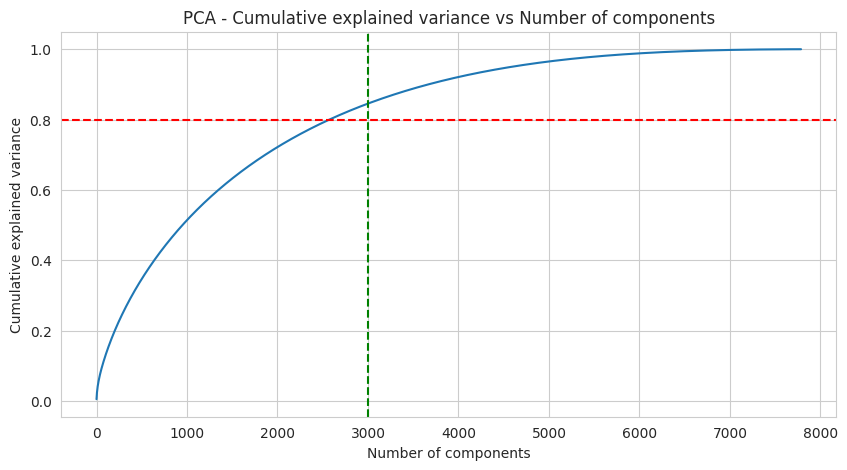

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 2500 components.

In [ ]:
pca=PCA(n_components=3000)
pca.fit(vector)

PCA(n_components=3000)

In [ ]:
X=pca.transform(vector)

In [ ]:
X.shape

(7787, 3000)

In [ ]:
df1['final'][0]

'futur elit inhabit island paradis far crowd slum get one chanc join save squalor jo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi brazil tv intern tv show tv drama tv sci fi fantasi'

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1-K-Means Clustering

In [ ]:
# ML Model - 1 Implementation
sos=[]
for i in range(1,13):
  kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
  # Fit the Algorithm
  kmeans.fit(X)
  #Compute the sum of squared errors for the model
  sos.append(kmeans.inertia_) 

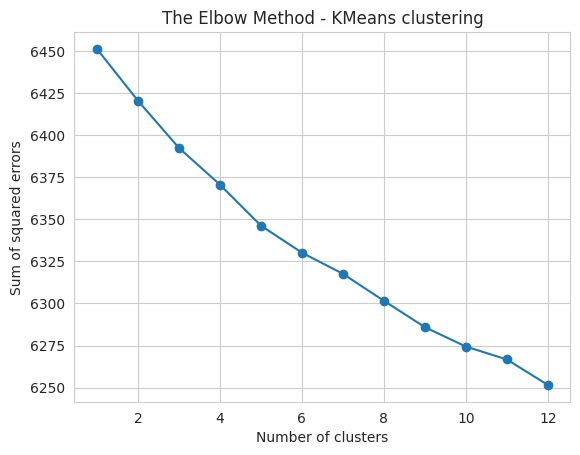

In [ ]:
#Plotting 
plt.plot(range(1,13),sos,marker='o')
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

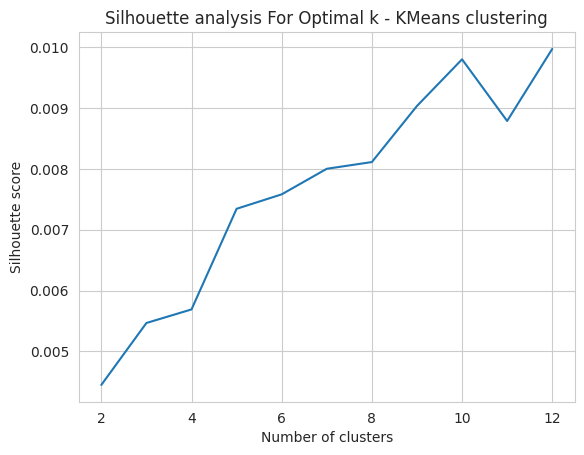

In [ ]:
silhouette_avg = []

for k in range(2, 13):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)
  
# Plot the Silhouette analysis
plt.plot(range(2,13), silhouette_avg)
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()
     

In [ ]:
# Clustering the data into 10 clusters
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=33)
kmeans.fit(X) 

KMeans(n_clusters=10, random_state=33)

In [ ]:
y_kmeans=kmeans.predict(X)

In [ ]:
#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, y_kmeans)

8.836064293942863

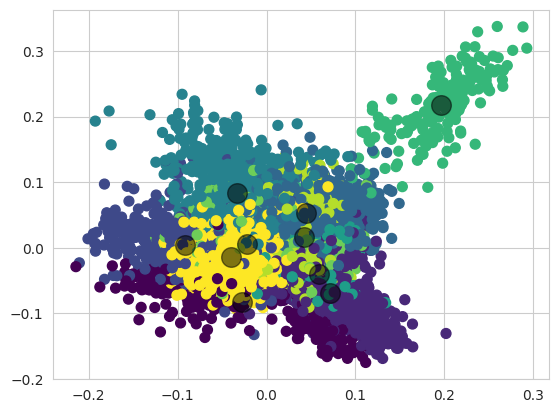

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6277.3286087969955, 0.008306417100910075)


In [ ]:
df1['kmeans_cluster'] = kmeans.labels_

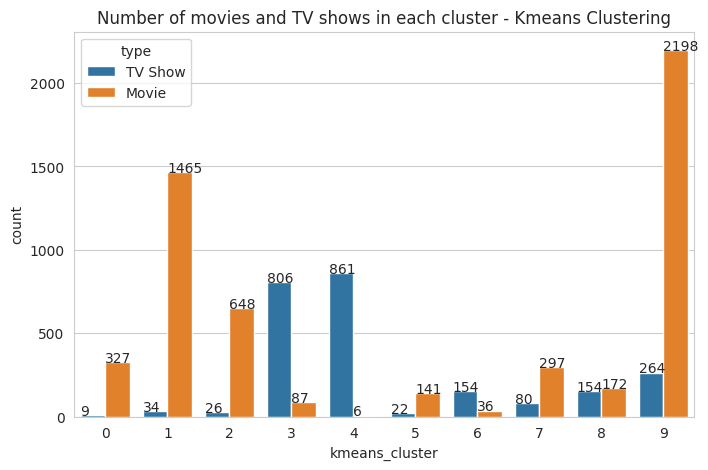

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

For n_clusters = 2 The average silhouette_score is : 0.004472306011249568
For n_clusters = 4 The average silhouette_score is : 0.006750833280680786
For n_clusters = 6 The average silhouette_score is : 0.006920787411998961
For n_clusters = 10 The average silhouette_score is : 0.009132388037219979


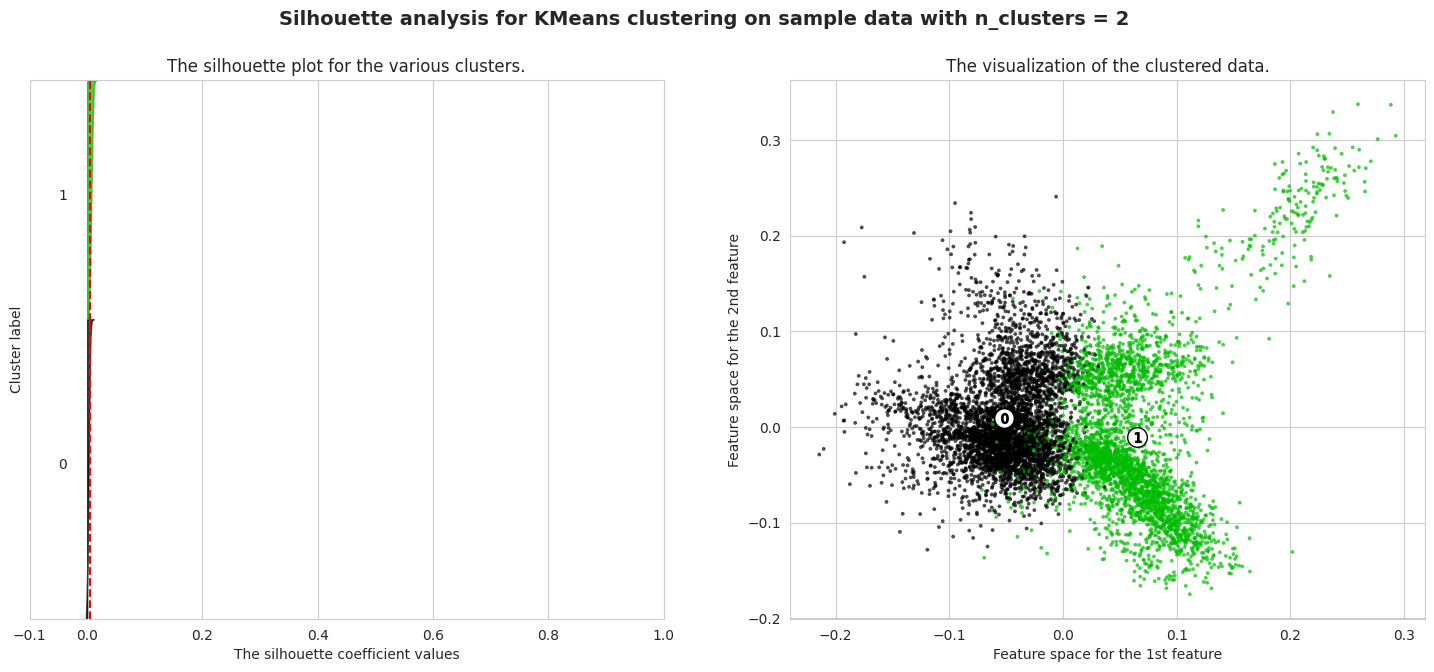

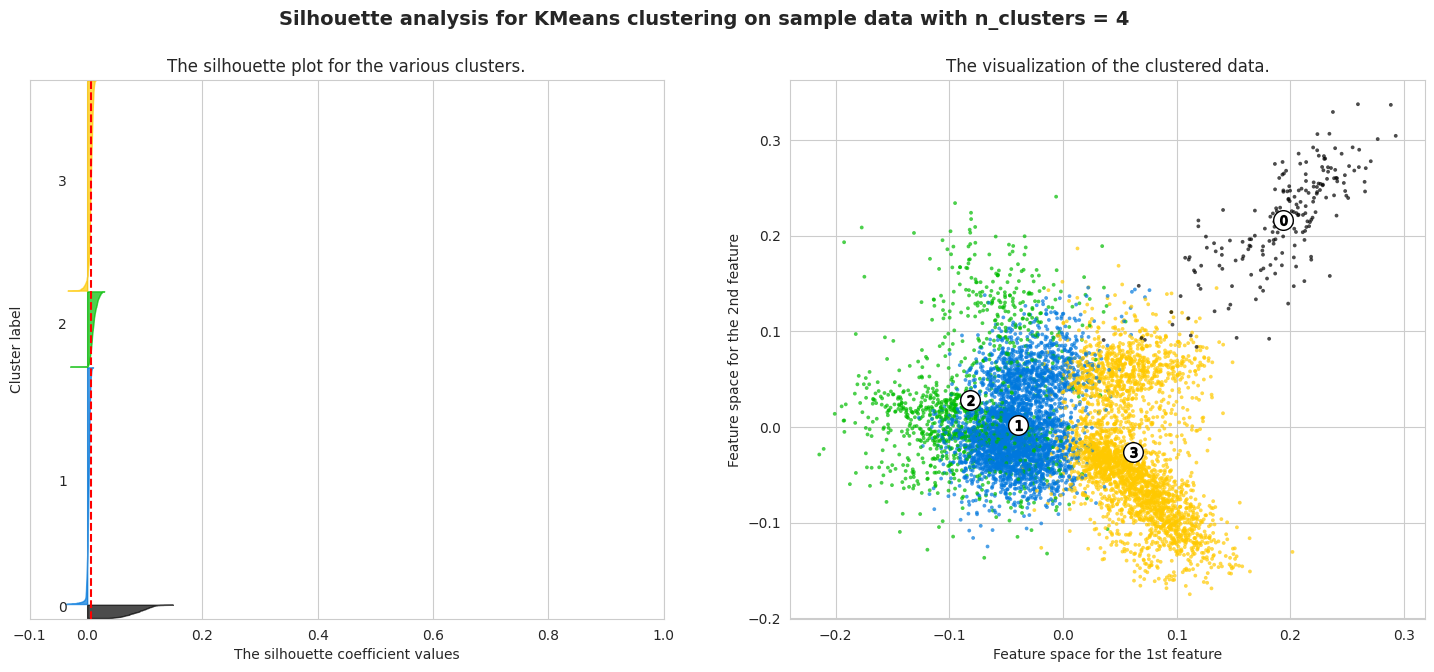

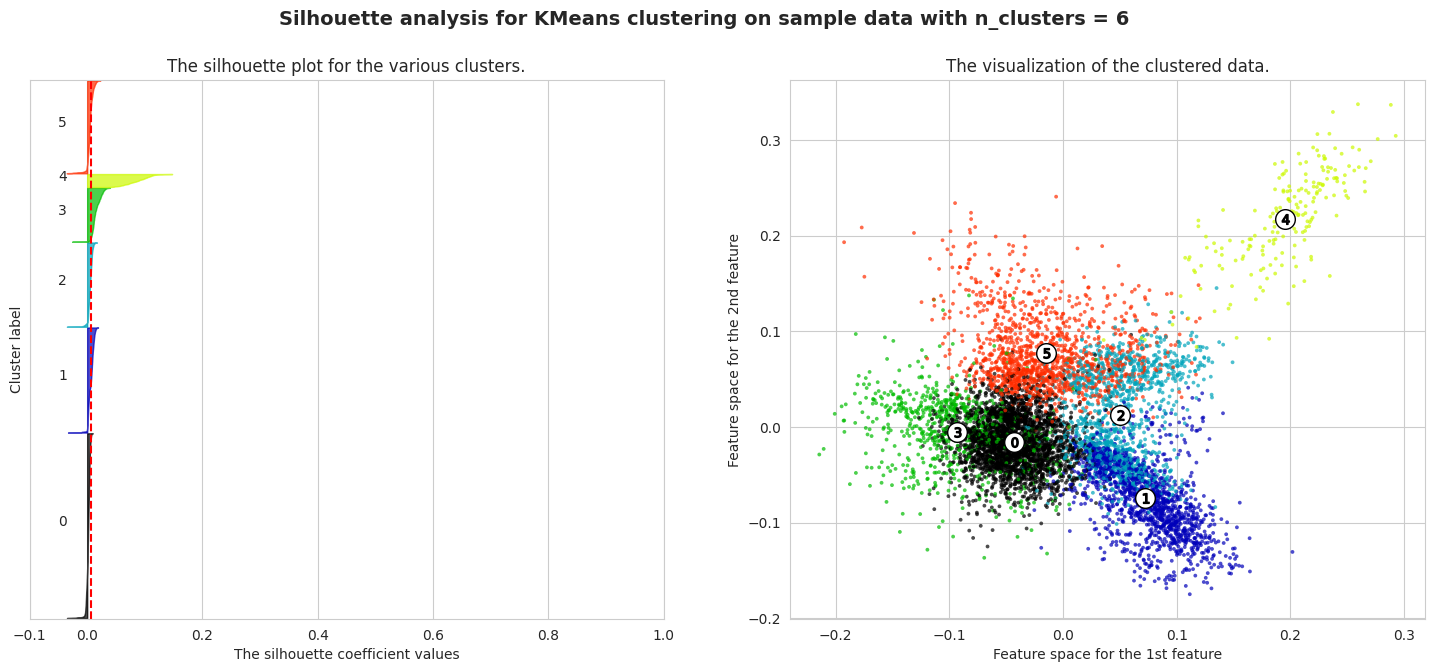

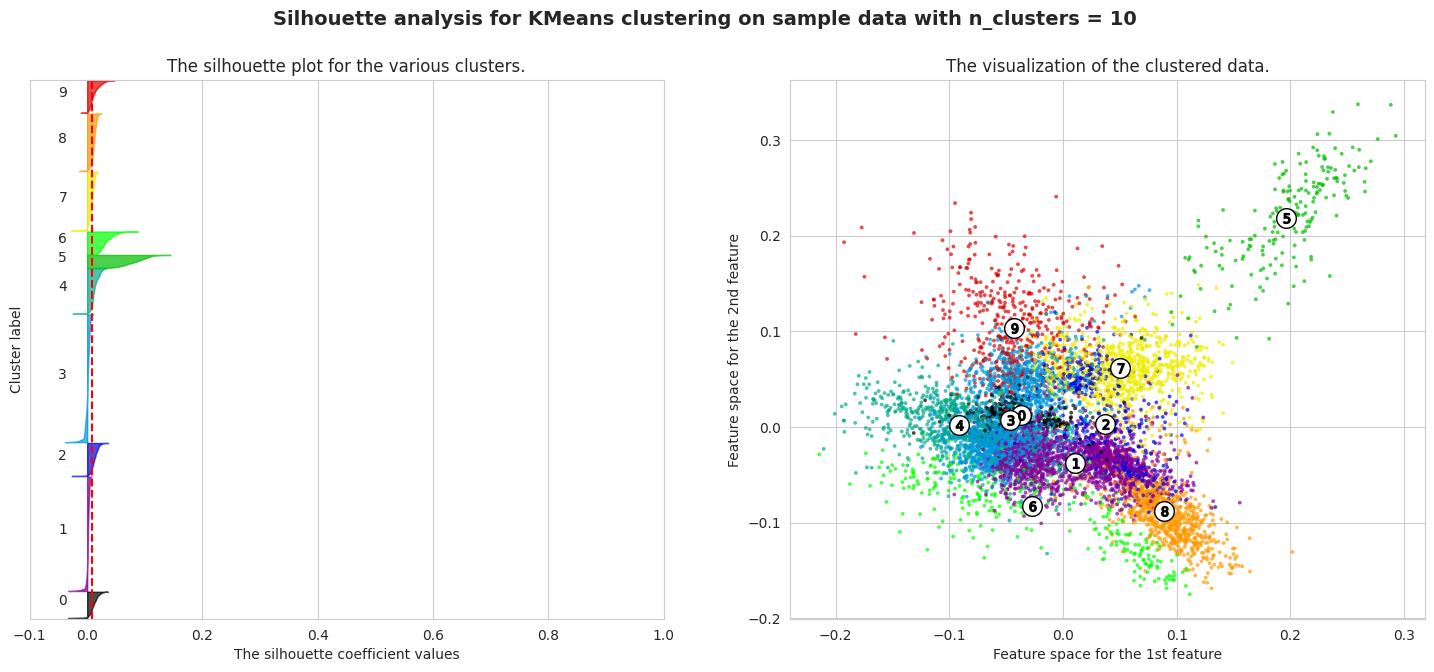

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 4, 6,df1['kmeans_cluster'].nunique()]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [ ]:
def kmeans_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df1_wordcloud = df1[['kmeans_cluster',column_name]].dropna()
  df1_wordcloud = df1_wordcloud[df1_wordcloud['kmeans_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df1_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [ ]:
df1['detail']=df1['title']+' '+df1['description']

cluster 0


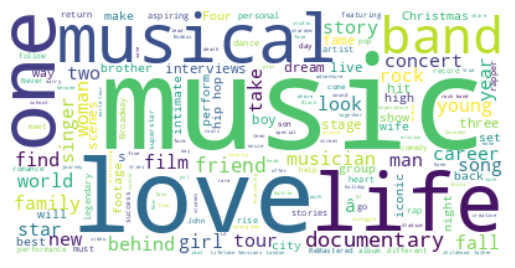

cluster 1


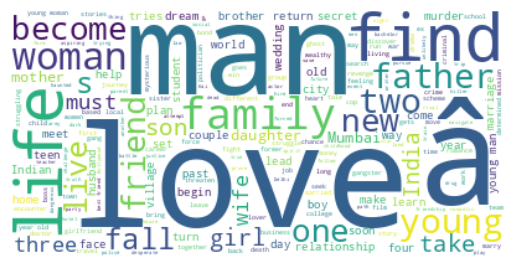

cluster 2


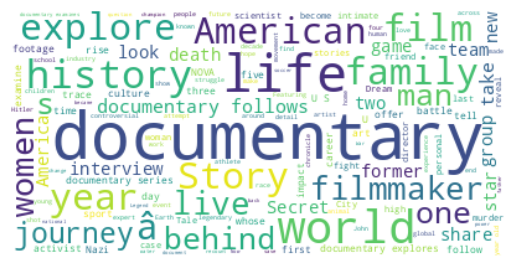

cluster 3


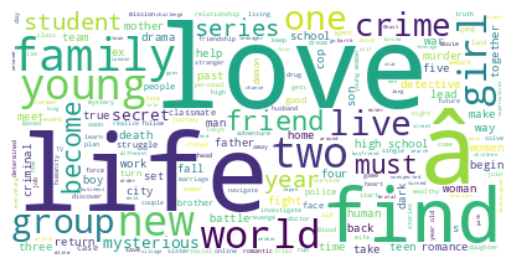

cluster 4


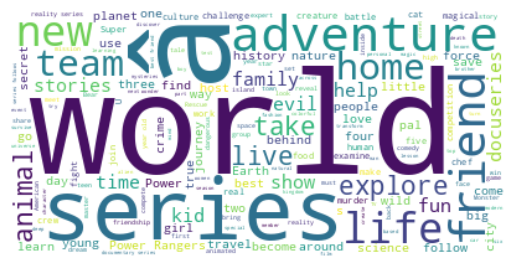

cluster 5


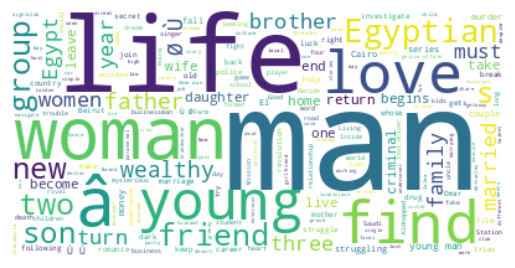

cluster 6


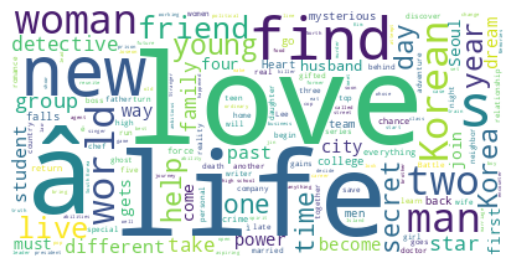

cluster 7


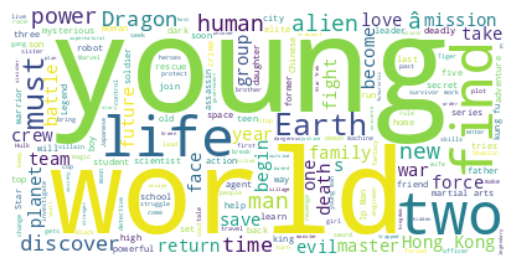

cluster 8


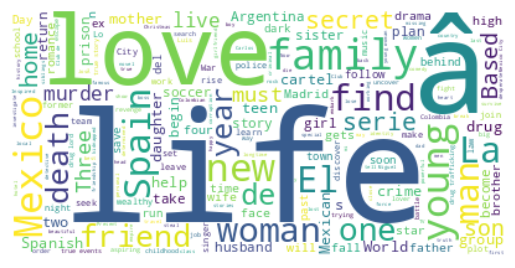

cluster 9


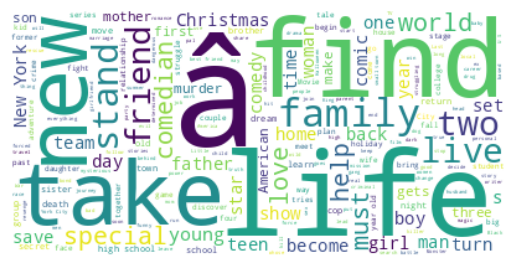

In [ ]:
for i in range(10):
  print(f'cluster {i}')
  kmeans_worldcloud(i,'detail')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

### ML Model - 2-Hierarchical Clustering

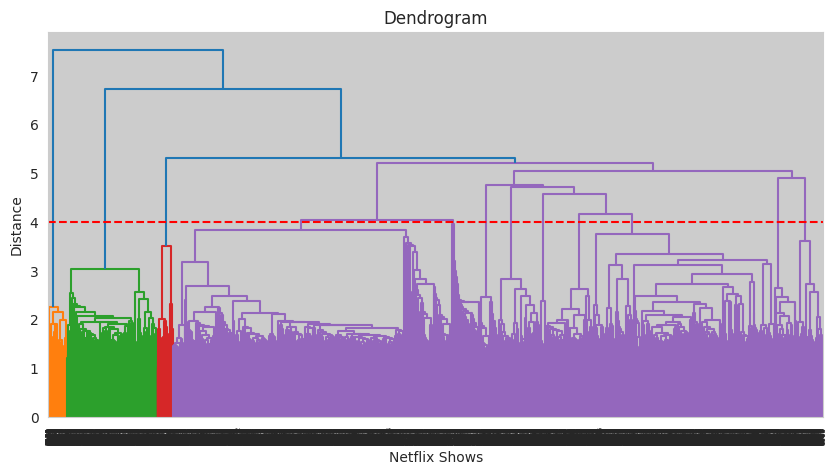

In [ ]:
# ML Model - 2 Implementation
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')


In [ ]:
unique_color=set(dend['color_list'])
optimal_cluster=len(unique_color)-1

In [ ]:
# Fit the Algorithm
h_cluster = AgglomerativeClustering(n_clusters=optimal_cluster, affinity='euclidean', linkage='ward')  
# Predict on the model
h_cluster.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df1['h_cluster']=h_cluster.labels_

In [ ]:
y_h=h_cluster.fit_predict(X)

In [ ]:
davies_bouldin_score(X, y_h)

7.9151606439124755

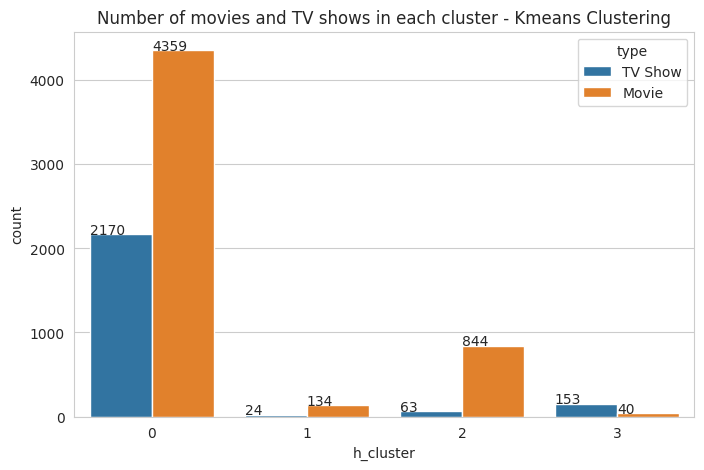

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='h_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

In [ ]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df1_wordcloud = df1[['h_cluster',column_name]].dropna()
  df1_wordcloud = df1_wordcloud[df1_wordcloud['h_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df1_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
     

cluster 0


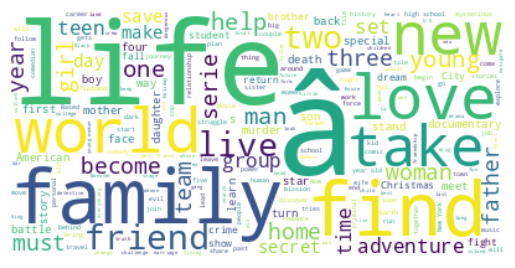

cluster 1


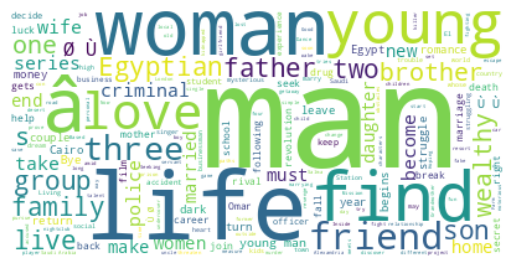

cluster 2


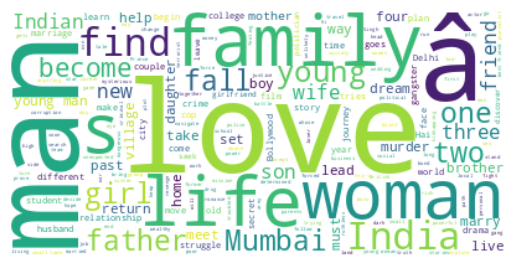

cluster 3


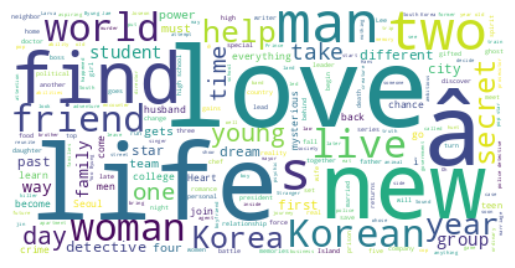

In [ ]:
for i in range(optimal_cluster):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'detail')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

In [ ]:
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.05762675,  0.01905944, ..., -0.01146293,
         0.00280293, -0.0212601 ],
       [ 0.05762675,  1.        , -0.00396037, ...,  0.05313645,
        -0.00744965, -0.02335245],
       [ 0.01905944, -0.00396037,  1.        , ..., -0.00696776,
        -0.00309462, -0.02282059],
       ...,
       [-0.01146293,  0.05313645, -0.00696776, ...,  1.        ,
        -0.00385542,  0.20836961],
       [ 0.00280293, -0.00744965, -0.00309462, ..., -0.00385542,
         1.        ,  0.00760806],
       [-0.0212601 , -0.02335245, -0.02282059, ...,  0.20836961,
         0.00760806,  1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = df1[df1['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df1.iloc[i[0]].title)

In [ ]:
recommend('ABCD 2')

If you liked 'ABCD 2', you may also enjoy: 

The Remix: Hip Hop X Fashion
ABCD: Any Body Can Dance
Dance Academy
Gabru: Hip Hop Revolution
The Next Step
What We Started
Numero Zero. The Roots of Italian Rap
Dancing Queen
LA Originals
Ek Jaan Hain Hum


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***